In [6]:
import os
import pandas as pd
import numpy as np
import skimage.io
import PIL
from tqdm.notebook import tqdm
import cv2
import random
import matplotlib.pyplot as plt
import joblib
from torch.utils.data import Dataset
import albumentations as A


path = 'C:\\Users\\pka\\panda_kaggle'
df = pd.read_csv(os.path.join(path,'train.csv'))

In [3]:
name = '00a7fb880dc12c5de82df39b30533da9.npy'
img =np.load(f'C:\\Users\\pka\\kaggle\\panda\\npy_16\\{name}')

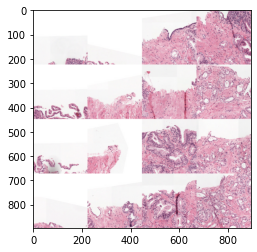

In [5]:
plt.imshow(img/255)

In [16]:
class trainDataset(Dataset):
    
    def __init__(self, df, labels, mode, transform = None):
        self.df = df
        self.labels = labels
        self.mode = mode
        self.transform = transform     
        
    def __len__(self):
        #return size of dataset
        return len(self.df)
    
    def __getitem__(self, idx):
        n = 16
        name = self.df['image_id'].values[idx]        
        temp = []
        img = os.path.join('C:\\Users\\pka\\kaggle\\panda\\npy_16', f'{name}.npy')       
        image = np.load(img)        
       
        img = image.reshape(4, 224, 4,224,3)
        img = np.transpose(img, (0,2,1,3,4)).reshape(-1, 224,224, 3)

        row = int(np.sqrt(n)) 
        blank_image = np.zeros((224*row, 224*row, 3))
        j = 0
        b = 0    
        for i in range(1, n + 1):
            if self.transform is not None:                
                image = self.transform(image = img[i-1].astype(np.uint8))['image']                 
            h = i - b
            w = j    
            if (i != 0) & (i % int(np.sqrt(n)) == 0):      
                j += 1
                b += int(np.sqrt(n))    
            h1 = abs(h-1) * 224
            w1 = w * 224    
            blank_image[h1: h1+224, w1: w1+224] = image
            

        image = blank_image
        image = image.astype(np.float32)
        image /= 255
        image = image.transpose(2, 0, 1)
        
        num = self.labels.values[idx]
        label = np.zeros(5).astype(np.float32)
        label[:num] = 1.

        #return image, label 
        return torch.tensor(image), torch.tensor(label)

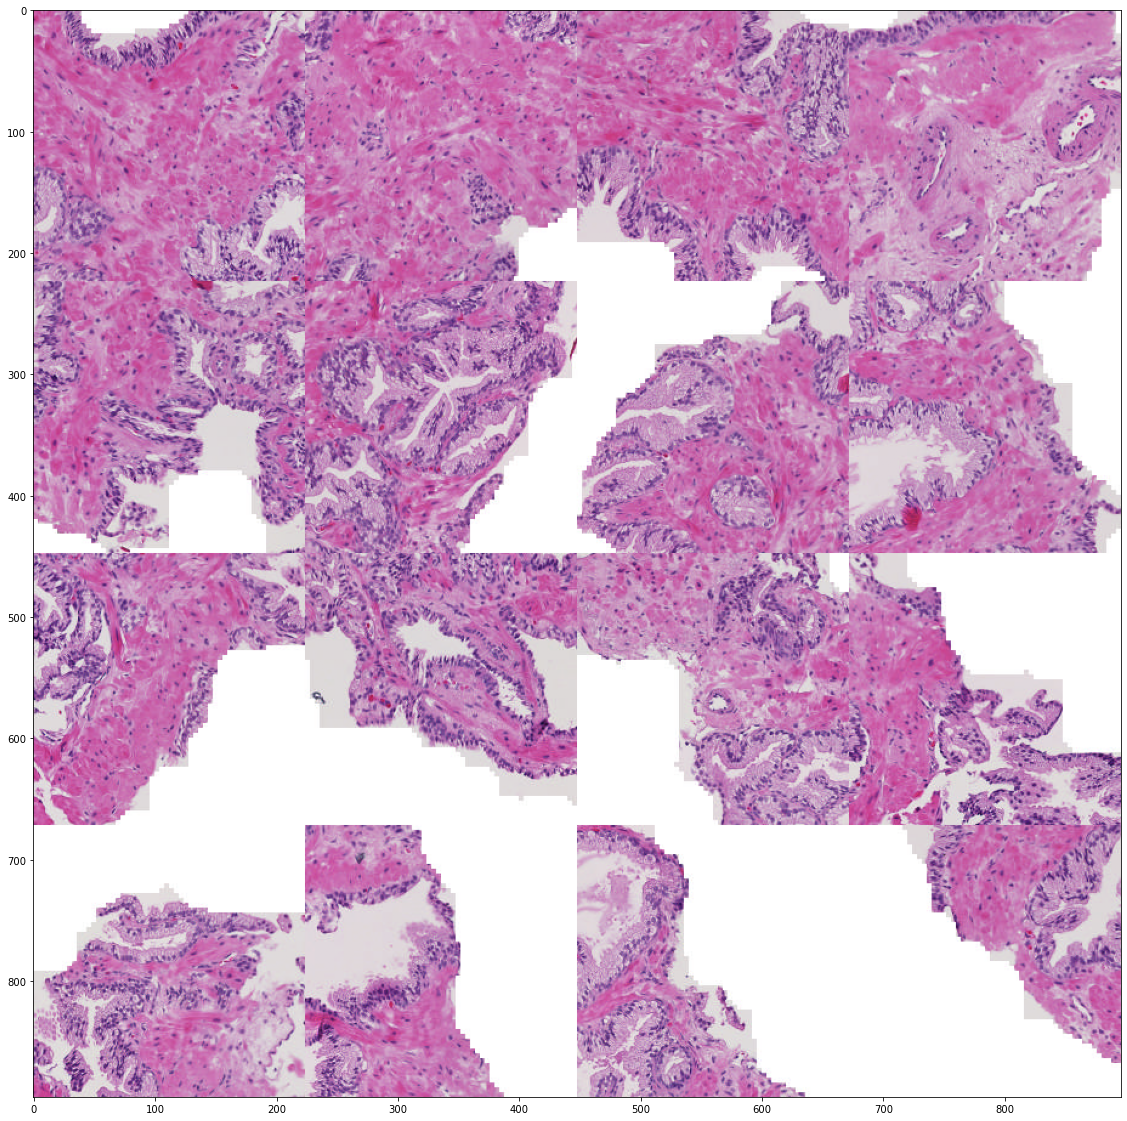

In [18]:
import torch
transforms_train = A.Compose([
#     A.OneOf([
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15),
#         A.OpticalDistortion(distort_limit=0.11, shift_limit=0.15),
#         A.NoOp()        
#     ]),
#     A.OneOf([
#         A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
#         A.RandomGamma(gamma_limit=(50, 150)),
#         A.NoOp()        
#     ]),
#     A.OneOf([
#         A.RGBShift(r_shift_limit=20, b_shift_limit=15, g_shift_limit=15),
#         A.FancyPCA(3),
#         A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=5),
#         A.NoOp()       
#     ]),
#     A.OneOf([
#         A.CLAHE(),
#         A.NoOp()         
#     ]),
    
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5), 
    
])

test_dataset = trainDataset(df, df.isup_grade, 0, transform= transforms_train)
img, _ = test_dataset[1]
plt.figure(figsize= (20, 20))
plt.imshow(np.transpose(img, (1,2, 0)))

In [ ]:
    def __getitem__(self, idx):
        n = 36
        name = self.df['image_id'].values[idx]               
        if self.rand:
            n = self.num            
        row = int(np.sqrt(n))        
        blank_image = np.zeros((224*row, 224*row, 3))
        j = 0
        b = 0    
        for i in range(1, n + 1):
            if self.rand:
                image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_36\\{name}_{np.random.choice(36)}.pkl') 
            else:
                image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_36\\{name}_{i-1}.pkl')
            if self.transform is not None:
                image = self.transform(image = image)['image'] 
            h = i - b
            w = j    
            if (i != 0) & (i % int(np.sqrt(n)) == 0):      
                j += 1
                b += int(np.sqrt(n))    
            h1 = abs(h-1) * 224
            w1 = w * 224    
            blank_image[h1: h1+224, w1: w1+224] = image       
        
        image = blank_image
        image = image.astype(np.float32)
        image /= 255       
        image = image.transpose(2, 0, 1)
        
        num = self.labels.values[idx]
        label = np.zeros(5).astype(np.float32)
        label[:num] = 1.

        #return image, label 
        return torch.tensor(image), torch.tensor(label)

In [2]:
list_name =[
    '07a14fa5b8f74272e4cc0a439dbc8f7f',
    '0bd231c85b2695e2cf021299e67a6afc',
    '0da0915a236f2fc98b299d6fdefe7b8b',
    '0e5806abc1cf909123d584e504dd9bf9',
    '0e62a4cba998a03d20295e07ebc30958',
    '0f1ea91c9f917bb3d198f02fd432e4ce',
    '158754df49e00760f8e4659a05e7cc0c',
    '16ad51c0a769aa6dd7d09671faca0b4e',
    '170c91c206648c545cfe69c718c059f2',
    '1aa5ff56e243cbc8ed0e140a7148f3fd',
    '1d432fcf31474114a1f5f12268b9a1ab',
    '28d2e92f40bdd98d7cd5275fa448fe2d',
    '29d140073e1fe204faacd8b1ff2086d8',
    '2ae016457e8ff8e21723a91b57a96d7d',
    '35c7912e941c9bf21594deeda6c891e2',
    '389a3fcfddfbd92bdcb69da5b10d383c',
    '3a6161c02efaf0c49fe4dc6ffd76c838',
    '3d459935dae8bbeb5bda9cfc40e4b3ab',
    '3e3d938e4279c4339473f26a7eb5020e',
    '432ec3aa0403cfd011d4489879fada9c',
    '4502c2c9c9c1041564225b9d8fad13c1',
    '46bf558b24bcdfe1f3ae711b02b53a63',
    '4e60bebc14d01b30a0873ba7ee026dac',
    '4f8506ad3366270f12cd7a31641495cb',
    '5204134e82ce75b1109cc1913d81abc6',
    '549f87924e4800a7112f6edd5c250ebe',
    '5ecebd2186ad8871c59a607bbd6d3a6d',
    '60a18d14b13eb21b56f3d3e77a315af7',
    '623055537fd299a566acf58214ae2133',
    '62a976bdc21bd2c8a34de5ec3d192857',
    '6844032932a3939565e936a523174b6d',
    '6a43f7e8b37e4f8a63ba3f178ef78016',
    '6cbc6f7259cb45a4086cd584aec53857',
    '6e229bc5d46c2bb07cb0ab6b64c30a48',
    '77545268b9c0cec2fd73b7cb9e03d66b',
    '7c03cedfde9bdd397d67c010fe7e61e2',
    '7c90a7a9ea4b644c26fa03ffd564676c',
    '886682be4f834c17abfcbd5137374279',
    '88e65e1d716893e6efdbd2464b3686fa',
    '8d5860e10e09ee25e066ee7fb699453d',
    '8d96e24f96029fb89ad33d017f1fbcfc',
    '94e121bc4a7091b881e8dd9b6c2be6b5',
    '99df939d41052c33bbd4af1bb923846d',
    '9a4ba048c62623465d6a7a0d8549a657',
    '9c24ae764d87098d03faccc2e2a579d0',
    '9e40b83c6ac2b92e2426b717ed1a200e',
    '9e9ace16f4d20d98a65d3936b953f442',
    'acc092b7ff833d1d9853a2efe449e66e',
    'b99ca5db00eca6566d106abce9cba70c',
    'bd31a494912d04160fec50b16a4d330f',
    'bf779325c9c16f04957839ba92518ab8',
    'bfc6ccb20af434cfb505aafc00dce754',
    'c0d0ba963f8eb0021719349ef60c1aa6',
    'c60d25e72004ddd6bc308d3a42ce6dba',
    'c6cf6f5137c7c67a77ea6a9f1ef73999',
    'cb91772271b72c237c42f64fb6d2e84e',
    'ce9932f7fb31128b15ef9390cc78fe4b',
    'd0115a12026bc4b8a10ad05fe4992ded',
    'd14168b713f3ba30243a69837a001115',
    'd67b041b85b44bdde7dc852dcbc70033',
    'd7b7b3e3d85c768d7a453e50679f2a80',
    'ddd302c374af146eeff0408e2b5da995',
    'e6ba38a0847082104bfcbd7ec1bf6f49',
    'e702bc96a10e3ff51dca2e8eef71e4af',
    'f1a7f32a0a9ed7c50796a10e150df72b'
]

drop = [
    'fa7ece1587e37e28416110063cc5266a',
    'fc20aec4fd0c2f9017888dd94feb84ee'
]

df = pd.read_csv(os.path.join(path, 'train.csv'))
df = df[~df.image_id.isin(drop)]

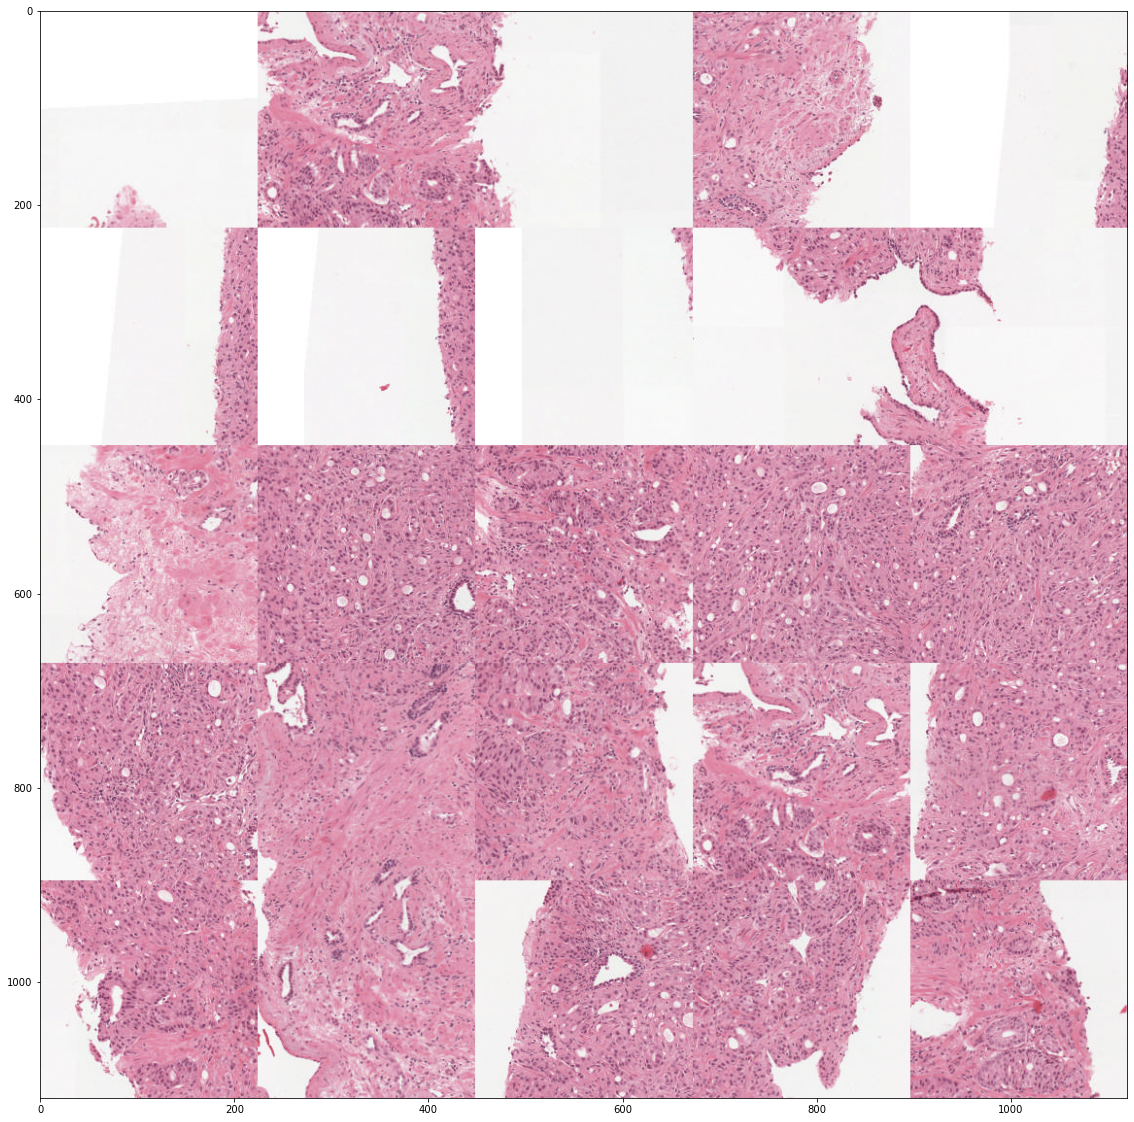

In [22]:
import albumentations as A

transforms_train = A.Compose([
#     A.OneOf([
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15),
#         A.OpticalDistortion(distort_limit=0.11, shift_limit=0.15),
#         A.NoOp()        
#     ]),
#     A.OneOf([
#         A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
#         A.RandomGamma(gamma_limit=(50, 150)),
#         A.NoOp()        
#     ]),
#     A.OneOf([
#         A.RGBShift(r_shift_limit=20, b_shift_limit=15, g_shift_limit=15),
#         A.FancyPCA(3),
#         A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=5),
#         A.NoOp()       
#     ]),
#     A.OneOf([
#         A.CLAHE(),
#         A.NoOp()         
#     ]),
    
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5), 
    
])

"""
(1):
    -shiftScaleR
    -OpticalD
    orNo
    
(2):
    -RandomBC
    -RandomG
    -orNo
    
(3)
    -RGB
    -Fancy
    -Hue
    -orNo
    
(4)
    -clahe
    -orNo
    
vertical
horizontal
transpose???
"""
name = df['image_id'].values[2]
img = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_25\\{name}.pkl')

plt.figure(figsize= (20, 20))
plt.imshow(img) 

In [ ]:
n = 25
for i in tqdm(range(len(df))):
    name = df['image_id'].values[i]    
    if name not in list_name:            
        try:
            image = skimage.io.MultiImage(os.path.join(path_train, f'{name}.tiff'))[1]
            #~50 no mask file skip
            image_mask = skimage.io.MultiImage(os.path.join(path_mask, f'{name}_mask.tiff'))[1]
        except:
            image_mask = None
        image = image_pad(image, image_mask, 1, 224) 
    else:            
        try:
            image = skimage.io.MultiImage(os.path.join(path_train, f'{name}.tiff'))[0]
            image_mask = skimage.io.MultiImage(os.path.join(path_mask, f'{name}_mask.tiff'))[0]
        except:
            image_mask = None                
        image = image_pad(image, image_mask, 1, 224)
    row = int(np.sqrt(n))
    blank_image = np.zeros((224*row, 224*row, 3))
    for h in range(row):
        for w in range(row):
            i = h * row + w       
            if len(image) > i: #<21
                img = image[i]
            else:
                img = np.ones((224, 224, 3)).astype(np.uint8) * 255                   
            #add to z_image
            h1 = h * 224
            w1 = w * 224 
            #print(img.shape)
            blank_image[h1: h1+224, w1: w1+224] = img /255
    #np.save(f'C:\\Users\\pka\\kaggle\\panda\\npy_25\\{name}', blank_image)
    joblib.dump(blank_image, f'C:\\Users\\pka\\kaggle\\panda\\pkl_25\\{name}.pkl')

In [15]:
import os
import cv2
import torch
import numpy as np 
import pandas as pd
from torch.utils.data import Dataset
path_train = 'D:\\prostate-cancer-grade-assessment\\train_images'
path_mask = 'D:\\prostate-cancer-grade-assessment\\train_label_masks'

def mask_idx(img, sz = 224):
    """
    img : image mask format img[:, :, 0]
    sz : size to cut image
    
    Два  варианта все значения(индексы), или так сказать более детальные маски
    
    return all_idx, idx
    """
    if img is None: return [], []
    
    idx_all, idx =  [], []
    img = img[:, :, 0]
    #make vert
    h, w = img.shape
    #pad
    pad_h, pad_w = (sz- img.shape[0]%sz)%sz, (sz- img.shape[1]%sz)%sz 
    img = np.pad(img,
             [
                 [pad_h//2, pad_h-pad_h//2],
                 [pad_w//2, pad_w-pad_w//2],
              ],
                 constant_values = 255)
    #reshape (14, 256, 5, 256)
    img = img.reshape(img.shape[0]//sz, sz, img.shape[1]//sz, sz)
    img = np.transpose(img, (0,2,1,3)).reshape(-1, sz, sz) # (70, 256, 256) 

    for i in range(img.shape[0]):
        if len(np.unique(img[i].reshape(-1))) > 3:
            idx.append(i)            
            
        if len(np.unique(img[i].reshape(-1))) >= 3:
            idx_all.append(i)

    return idx_all, idx         

def image_pad(img, img_mask, mode = 0, sz =224):  
    # 21*224*224 # 1053696
    # 16*256*256 # 1048576
    n = 25 #21    
    h, w, c = img.shape        
    pad_h, pad_w = (sz - h%sz)%sz, (sz - w%sz)%sz
    img = np.pad(img,
                 [
                     [pad_h//2, pad_h-pad_h//2],
                     [pad_w//2, pad_w-pad_w//2],
                     [0,0]
                 ],
                 constant_values = 255)
    img = img.reshape(img.shape[0]// sz, sz, img.shape[1]// sz, sz, 3) # (4, 256, 2, 256, 3)
    img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3) #(4, 2, 256, 256, 3)--> (8, 256, 256, 3)

    idx_default = np.argsort(img.reshape(img.shape[0],-1).sum(-1))

#     if mode == 0:  
#         #print(f'Mode : {mode}')        
#         return img[idx_default[:16]]
    
    idx_all, idx = mask_idx(img_mask, sz = sz)
    
    #set index_default - idx 
    #what diff idx for idx_default
    #after add diff to idx
    
    #mode = 1
    
    if len(idx) >= n:
        return img[idx[:n]]    
    
    if len(idx) > 0:
        diff = set(idx_default) - set(idx)
        count_add = abs(len(idx) - len(diff))
        x = np.append(idx, idx_default[:count_add])
        if len(x) < n:
            return img[idx_default[:n]]
            
        assert len(x[:n]) == n, 'Error index incorrect.....'
        return img[x[:n]]
    else:
        return img[idx_default[:n]] 

class trainDataset(Dataset):
    
    def __init__(self, df, labels, mode, transform = None):
        self.df = df
        self.labels = labels
        self.mode = mode
        self.transform = transform     
        
    def __len__(self):
        #return size of dataset
        return len(self.df)
    
    def __getitem__(self, idx):
        name = self.df['image_id'].values[idx]
        if name not in list_name:            
            try:
                image = skimage.io.MultiImage(os.path.join(path_train, f'{name}.tiff'))[1]
                #~50 no mask file skip
                image_mask = skimage.io.MultiImage(os.path.join(path_mask, f'{name}_mask.tiff'))[1]
            except:
                image_mask = None
            image = image_pad(image, image_mask, 1, 224) 
        else:            
            try:
                image = skimage.io.MultiImage(os.path.join(path_train, f'{name}.tiff'))[0]
                image_mask = skimage.io.MultiImage(os.path.join(path_mask, f'{name}_mask.tiff'))[0]
            except:
                image_mask = None                
            image = image_pad(image, image_mask, 1, 224)
            
        row = int(np.sqrt(25))
        blank_image = np.zeros((224*row, 224*row, 3))              
        for h in range(row):
            for w in range(row):
                i = h * row + w #position  by image
                img = image[i]
                #img = img * 255
                img= img.astype(np.uint8)
                #img *= 255.999
                if self.transform is not None:
                    img = self.transform(image = img)['image']                    
                #add to z_image                
                h1 = h * 224
                w1 = w * 224 
                blank_image[h1: h1+224, w1: w1+224] = img #/255
        image = blank_image
        image = image.astype(np.float32)
        image /= 255       
        image = image.transpose(2, 0, 1)
        
        num = self.labels.values[idx]
        label = np.zeros(5).astype(np.float32)
        label[:num] = 1.

        #return image, label 
        return torch.tensor(image), torch.tensor(label)

In [5]:
class trainDataset(Dataset):
    
    def __init__(self, df, labels, mode, transform = None):
        self.df = df
        self.labels = labels
        self.mode = mode
        self.transform = transform     
        
    def __len__(self):
        #return size of dataset
        return len(self.df)
    
    def __getitem__(self, idx):
        name = self.df['image_id'].values[idx]
        image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_16\\{name}.pkl')              
        row = int(np.sqrt(16))
        blank_image = np.zeros((224*row, 224*row, 3))      
        image = image.reshape(4, 224, 4, 224,3)
        image = np.transpose(image, (0,2,1,3,4)).reshape(-1, 224,224, 3)        
        for h in range(row):
            for w in range(row):
                i = h * row + w #position  by image
                img = image[i]
                img = img * 255
                img= img.astype(np.uint8)
                #img *= 255.999
                if self.transform is not None:
                    img = self.transform(image = img)['image']                    
                #add to z_image                
                h1 = h * 224
                w1 = w * 224 
                blank_image[h1: h1+224, w1: w1+224] = img #/255
        image = blank_image
        image = image.astype(np.float32)
        image /= 255       
        image = image.transpose(2, 0, 1)
        
        num = self.labels.values[idx]
        label = np.zeros(5).astype(np.float32)
        label[:num] = 1.

        #return image, label 
        return torch.tensor(image), torch.tensor(label)

In [148]:
class trainDataset(Dataset):
    
    def __init__(self, df, labels, num, rand = True, transform = None):
        self.df = df
        self.labels = labels
        self.num = num
        self.transform = transform     
        self.rand = rand
        
    def __len__(self):
        #return size of dataset
        return len(self.df)
    
    def __getitem__(self, idx):
        n = 36
        name = self.df['image_id'].values[idx]               
        if self.rand:
            n = self.num            
        row = int(np.sqrt(n))        
        blank_image = np.zeros((224*row, 224*row, 3))
        j = 0
        b = 0    
        for i in range(1, n + 1):
            if self.rand:
                image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_36\\{name}_{np.random.choice(36)}.pkl') 
            else:
                image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_36\\{name}_{i-1}.pkl')
            if self.transform is not None:
                image = self.transform(image = image)['image'] 
            h = i - b
            w = j    
            if (i != 0) & (i % int(np.sqrt(n)) == 0):      
                j += 1
                b += int(np.sqrt(n))    
            h1 = abs(h-1) * 224
            w1 = w * 224    
            blank_image[h1: h1+224, w1: w1+224] = image       
        
        image = blank_image
        image = image.astype(np.float32)
        image /= 255       
        image = image.transpose(2, 0, 1)
        
        num = self.labels.values[idx]
        label = np.zeros(5).astype(np.float32)
        label[:num] = 1.

        #return image, label 
        return torch.tensor(image), torch.tensor(label)

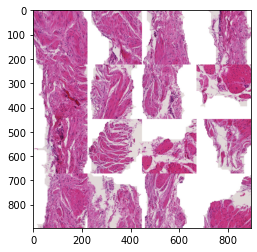

In [94]:
n = 16
name = '09c591c160a3a43be8e03dfcab80b4c0'
j = 0
b = 0

row = int(np.sqrt(n))        
blank_image = np.zeros((224*row, 224*row, 3)) 
for i in range(1, n+1):
    image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_36\\{name}_{i-1}.pkl')
    h = i - b
    w = j    
    if (i != 0) & (i % int(np.sqrt(n)) == 0):      
        j+=1
        b+= int(np.sqrt(n))
    h1 = abs(h-1) * 224
    w1 = w * 224    
    blank_image[h1: h1+224, w1: w1+224] = image

plt.imshow(blank_image/255)

In [112]:
temp = []

In [125]:
len(temp)

26

In [20]:
image = joblib.load(f'C:\\Users\\pka\\kaggle\\panda\\pkl_36\\{name}_{1}.pkl') 

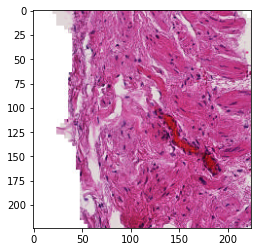

In [21]:
plt.imshow(image)

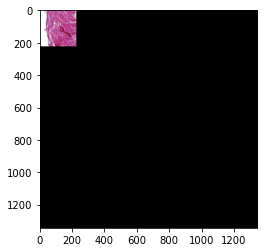

In [23]:
row = int(np.sqrt(n))        
blank_image = np.zeros((224*row, 224*row, 3)) 
h1= 0
w1= 0
blank_image[h1: h1+224, w1: w1+224] = image /255
plt.imshow(blank_image)

In [170]:
int(np.sqrt(2)) - np.sqrt(2)

-0.41421356237309515

In [178]:
i = 0
if (i == 0) & ((int(np.sqrt(i)) - np.sqrt(i)) != 0.0):
    print('Hey correct', i)
else: print('Else')
    

Else


In [164]:
False & True & True

False

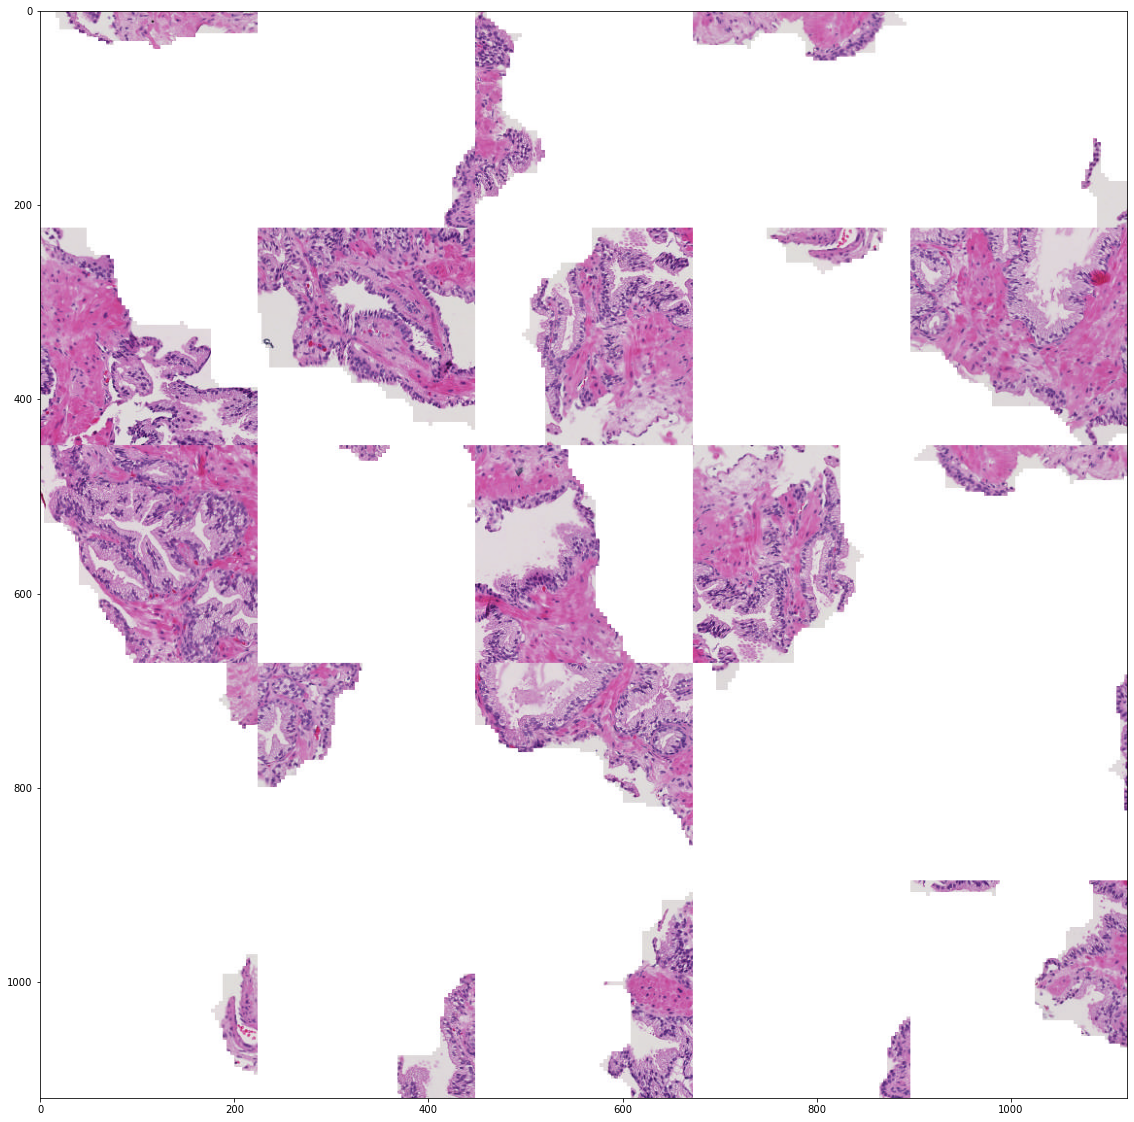

In [149]:
transforms_train = A.Compose([
#     A.OneOf([
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15),
#         A.OpticalDistortion(distort_limit=0.11, shift_limit=0.15),
#         A.NoOp()        
#     ]),
#     A.OneOf([
#         A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
#         A.RandomGamma(gamma_limit=(50, 150)),
#         A.NoOp()        
#     ]),
#     A.OneOf([
#         A.RGBShift(r_shift_limit=20, b_shift_limit=15, g_shift_limit=15),
#         A.FancyPCA(3),
#         A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=5),
#         A.NoOp()       
#     ]),
#     A.OneOf([
#         A.CLAHE(),
#         A.NoOp()         
#     ]),
    
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5), 
    
])
import torch
test_dataset = trainDataset(df, df.isup_grade, 0, rand = True, transform= transforms_train)
img, _ = test_dataset[1]
plt.figure(figsize= (20, 20))
plt.imshow(np.transpose(img, (1,2, 0)))

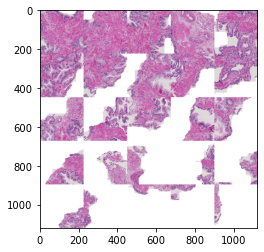

In [83]:
plt.imshow(np.transpose(img, (1,2, 0))/255)